<b>

<p>
<center>
<font size="6">
Mini-Project: Analysing and Predicting Life Expectancy
</font>
</center>
</p>

<p>
<center>
<font size="4">
SC1015: Data Science and Artifial Intelligence, Nanyang Technological University
</font>
</center>
</p>

</b>

<p>
<center>
<font size="3">
<em>Done By: Chan Kit Ho and Chiang Qin Zhi</em>
</font>
</center>
</p>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report, mean_squared_error,r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz



# **Part 1: Data Cleaning and Preparation**

First, we import the dataset from a .csv file into a Pandas DataFrame and explore the dataset.

In [3]:
LifeData = pd.read_csv('Life-Expectancy-Data-Updated.csv')
LifeData

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


The description of the dataset is as available below:  
>**Year** : Year  
>**Status** : Developed or Developing status  
>**Life expectancy** : Life Expectancy in age  
>**Adult Mortality** : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)  
>**Infant deaths** : Number of Infant Deaths per 1000 population  
>**Alcohol** : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)  
>**percentage expenditure** : Expenditure on health as a percentage of Gross Domestic Product per capita(%)  
>**Hepatitis B** : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)  
>**Measles** : Measles - number of reported cases per 1000 population  
>**BMI** : Average Body Mass Index of entire population  
>**Under-five deaths** : Number of under-five deaths per 1000 population  
>**Polio** : Polio (Pol3) immunization coverage among 1-year-olds (%)  
>**Total expenditure** : General government expenditure on health as a percentage of total government expenditure (%)  
>**Diphtheria** : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)  
>**HIV/AIDS** : Deaths per 1 000 live births HIV/AIDS (0-4 years)  
>**GDP** : Gross Domestic Product per capita (in USD)  
>**Population** : Population of the country  
>**thinness 1-19 years** : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )  
>**thinness 5-9 years** : Prevalence of thinness among children for Age 5 to 9(%)  
>**Income composition of resources** : Human Development Index in terms of income composition of resources (index range from 0 to 1)  
>**Schooling** : Number of years of Schooling(years)  


In [4]:
print("Life Expectancy Dataset Shape:", LifeData.shape, "\n")
print("Life Expectancy Dataset:", LifeData.info, "\n")

Life Expectancy Dataset Shape: (2864, 21) 

Life Expectancy Dataset: <bound method DataFrame.info of         Country          Region  Year  Infant_deaths  Under_five_deaths  \
0       Turkiye     Middle East  2015           11.1               13.0   
1         Spain  European Union  2015            2.7                3.3   
2         India            Asia  2007           51.5               67.9   
3        Guyana   South America  2006           32.8               40.5   
4        Israel     Middle East  2012            3.4                4.3   
...         ...             ...   ...            ...                ...   
2859      Niger          Africa  2000           97.0              224.9   
2860   Mongolia            Asia  2009           23.9               28.6   
2861  Sri Lanka            Asia  2004           17.7               28.9   
2862  Lithuania  European Union  2002            7.9                9.9   
2863    Iceland  Rest of Europe  2011            2.1                2.6   

Definitions of Variables:


We can see that there are multiple null or missing values. As part of the process, we will be removing them and placing them in a new DataFrame.

In [5]:
LifeData_Clean = pd.DataFrame(LifeData) #Duplicating the Dataframe
#LifeData_Clean = LifeData_Clean.dropna()
#ifeData_Clean = LifeData_Clean.loc[(LifeData_Clean != 0).all(axis=1)]

#LifeData_Clean = LifeData_Clean[(LifeData_Clean["Measles "]!= 0) & (LifeData_Clean["Measles "].notna())] # Removing rows with column Measles == 0 or NA.
#LifeData_Clean = LifeData_Clean[(LifeData_Clean["GDP"]!= 0) & (LifeData_Clean["GDP"].notna())] # Removing rows with column GDP == 0 or NA.
#LifeData_Clean = LifeData_Clean[(LifeData_Clean[" HIV/AIDS"]!= 0) & (LifeData_Clean[" HIV/AIDS"].notna())] # Removing rows with column HIV/AIDS == 0 or NA.

#LifeData_Clean.to_csv('LifeData_Clean.csv')

In [6]:
LifeData_Clean


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


Noting that the following variables - Hepatitis B, Polio and Diphtheria reflect the immunization coverage among 1-year-olds (%), we will group these variables into one single variable "Essential Immunization", which reflects the essential immunization coverage among 1-year-olds (%) for simplistic sake.

In [7]:
LifeData_Clean["Essential_Immunization"] = round((LifeData_Clean["Hepatitis_B"] + LifeData_Clean["Polio"] + LifeData_Clean["Diphtheria"] + LifeData_Clean["Measles"]) / 4,1)
# Drop the individual columns for Hepatitis B, Polio, and Diphtheria
LifeData_Clean.drop(["Hepatitis_B", "Polio", "Diphtheria","Measles"], axis=1, inplace=True)
print(LifeData_Clean.head())

   Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption   BMI  Incidents_HIV  GDP_per_capita  \
0         105.8240                 1.32  27.8           0.08           11006   
1          57.9025                10.35  26.0           0.09           25742   
2         201.0765                 1.57  21.2           0.13            1076   
3         222.1965                 5.68  25.3           0.79            4146   
4          57.9510                 2.89  27.0           0.08           33995   

   Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
0           78.53     

In [8]:
LifeData_Clean.head


<bound method NDFrame.head of         Country          Region  Year  Infant_deaths  Under_five_deaths  \
0       Turkiye     Middle East  2015           11.1               13.0   
1         Spain  European Union  2015            2.7                3.3   
2         India            Asia  2007           51.5               67.9   
3        Guyana   South America  2006           32.8               40.5   
4        Israel     Middle East  2012            3.4                4.3   
...         ...             ...   ...            ...                ...   
2859      Niger          Africa  2000           97.0              224.9   
2860   Mongolia            Asia  2009           23.9               28.6   
2861  Sri Lanka            Asia  2004           17.7               28.9   
2862  Lithuania  European Union  2002            7.9                9.9   
2863    Iceland  Rest of Europe  2011            2.1                2.6   

      Adult_mortality  Alcohol_consumption   BMI  Incidents_HIV  \
0 

---
# **Part 2: Exploratory Data Analysis (EDA)**

As there too many variables, we can check the correlation of the other predictor variables with the response variable, Life Expectancy, to determine which variables to pick. 

This is because, in later sections, using too many variables will result in overfitting for our linear regression model. Though R^2 will increase by virtue of adding more variables, Adjusted R^2 which accounts for number of predictors will be affected.

In [9]:
LifeData_Clean.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
BMI                            float64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
Essential_Immunization         float64
dtype: object

In [10]:
LifeData_Clean["Infant_deaths"] = LifeData_Clean["Infant_deaths"].astype(float)
LifeData_Clean["Under_five_deaths"] = LifeData_Clean["Under_five_deaths"].astype(float)

In [11]:
LifeData_Clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2864.0,2007.500000,4.610577,2000.000,2003.75000,2007.5000,2011.250000,2015.0000
Infant_deaths,2864.0,30.363792,27.538117,1.800,8.10000,19.6000,47.350000,138.1000
Under_five_deaths,2864.0,42.938268,44.569974,2.300,9.67500,23.1000,66.000000,224.9000
Adult_mortality,2864.0,192.251775,114.910281,49.384,106.91025,163.8415,246.791375,719.3605
Alcohol_consumption,2864.0,4.820882,3.981949,0.000,1.20000,4.0200,7.777500,17.8700
BMI,2864.0,25.032926,2.193905,19.800,23.20000,25.5000,26.400000,32.1000
Incidents_HIV,2864.0,0.894288,2.381389,0.010,0.08000,0.1500,0.460000,21.6800
GDP_per_capita,2864.0,11540.924930,16934.788931,148.000,1415.75000,4217.0000,12557.000000,112418.0000
Population_mln,2864.0,36.675915,136.485867,0.080,2.09750,7.8500,23.687500,1379.8600
Thinness_ten_nineteen_years,2864.0,4.865852,4.438234,0.100,1.60000,3.3000,7.200000,27.7000


Year
2000    66.360335
2001    66.650279
2002    66.886592
2003    67.170391
2004    67.549721
2005    67.856425
2006    68.221788
2007    68.588268
2008    68.991061
2009    69.388827
2010    69.777095
2011    70.177095
2012    70.521788
2013    70.877095
2014    71.216760
2015    71.463687
Name: Life_expectancy, dtype: float64


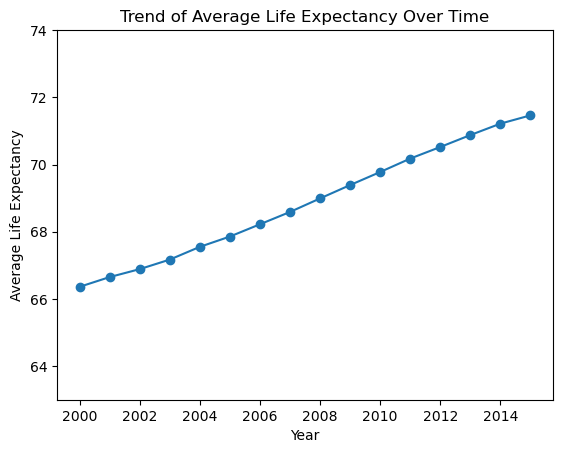

In [12]:
# Group the data by year and calculate the mean life expectancy for each year
yearly_mean = LifeData_Clean.groupby('Year')['Life_expectancy'].mean()
print(yearly_mean)
# Plot the resulting data using matplotlib's plot function
plt.plot(yearly_mean.index, yearly_mean.values,'o-')
plt.title('Trend of Average Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.ylim([63,74])
plt.show()

Region
Africa                           57.847304
Asia                             69.454861
Central America and Caribbean    72.437500
European Union                   77.715046
Middle East                      73.975446
North America                    77.841667
Oceania                          69.517614
Rest of Europe                   74.525417
South America                    72.780729
Name: Life_expectancy, dtype: float64


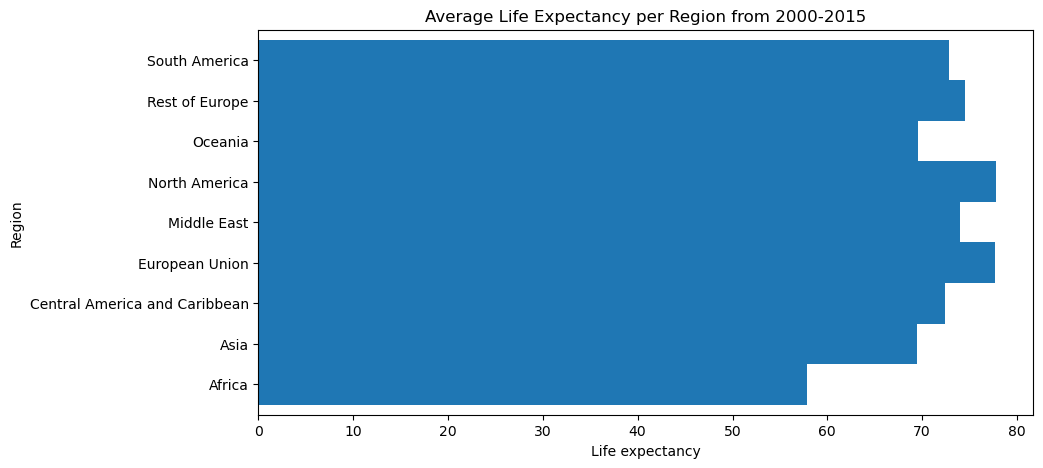

In [13]:
avg_life_expectancies = LifeData_Clean.groupby('Region').Life_expectancy.mean()
avg_life_expectancies.columns =['Region', 'Life Expectancy']
print(avg_life_expectancies)

fig = plt.figure(figsize=(10, 5))
avg_life_expectancies.plot(kind="barh",width=1)
plt.xlabel("Life expectancy")
plt.title("Average Life Expectancy per Region from 2000-2015")
plt.show()

In [14]:
LifeData_Clean.corr()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,BMI,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Essential_Immunization
Year,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.161422,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15,0.174359,0.158469
Infant_deaths,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.661988,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01,-0.920032,-0.728092
Under_five_deaths,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.665255,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01,-0.920419,-0.723690
Adult_mortality,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.522866,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01,-0.945360,-0.525637
Alcohol_consumption,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.284032,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01,0.399159,0.321396
BMI,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,1.000000,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01,0.598423,0.483133
Incidents_HIV,-8.174257e-02,0.349458,0.369618,0.699119,-0.034118,-0.161142,1.000000,-0.169590,-0.058040,0.188765,0.193847,-0.201246,-1.756352e-01,1.756352e-01,-0.553027,-0.153823
GDP_per_capita,4.099817e-02,-0.512286,-0.469682,-0.510121,0.443966,0.336180,-0.169590,1.000000,-0.040839,-0.375270,-0.381032,0.580626,6.675469e-01,-6.675469e-01,0.583090,0.324484
Population_mln,1.515762e-02,0.007622,-0.005234,-0.053848,-0.039119,-0.166482,-0.058040,-0.040839,1.000000,0.256322,0.258486,-0.033562,-3.530183e-02,3.530183e-02,0.026298,-0.073499
Thinness_ten_nineteen_years,-4.490053e-02,0.491192,0.466978,0.382140,-0.446366,-0.596483,0.188765,-0.375270,0.256322,1.000000,0.938757,-0.571485,-4.160977e-01,4.160977e-01,-0.467824,-0.344821


Heatmap for easier visualisation.

<AxesSubplot:>

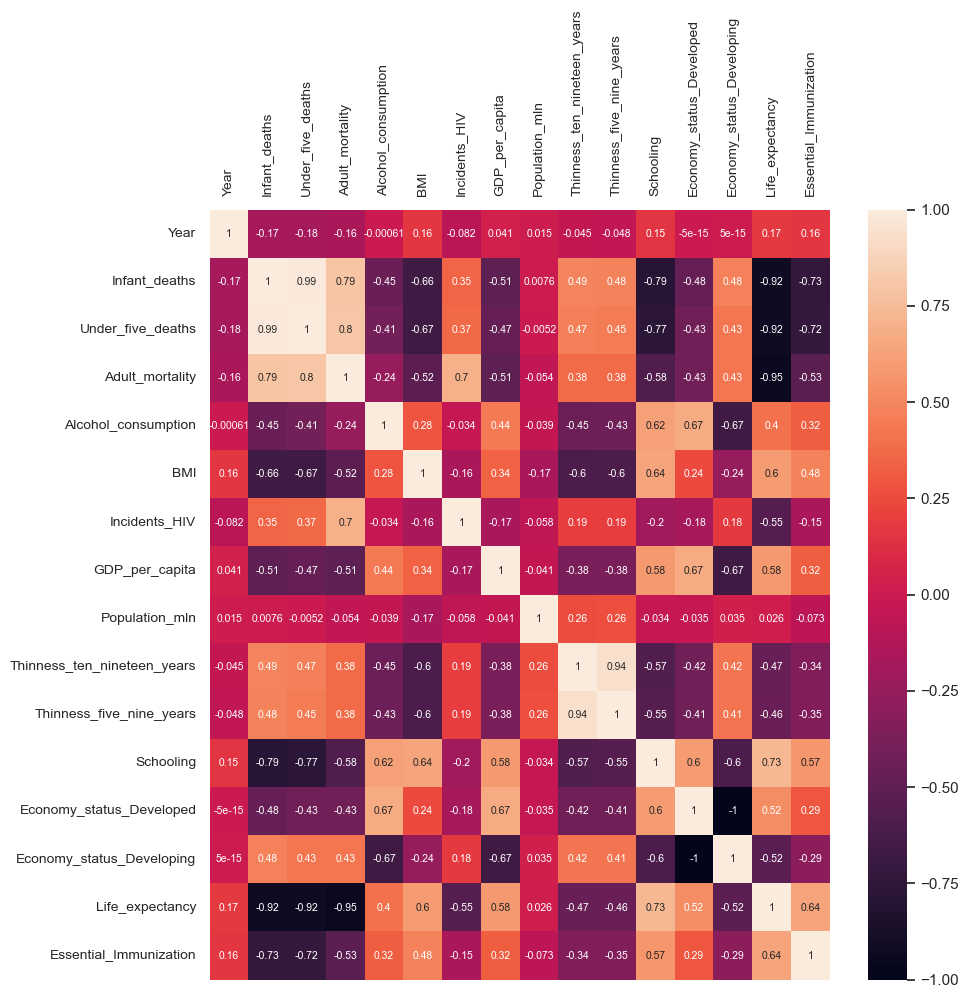

In [15]:
sb.set (rc = {'figure.figsize':(10, 10)})
plt.tick_params(labelsize=10, labelbottom = False, labeltop=True)
sb.heatmap(LifeData_Clean.corr(), annot = True, annot_kws={"fontsize":7.5})

Looking at heatmap, there is a good relationship (correlation exists) between the best 'GDP' and 'percentage expenditure' and 'Income Composition of Resources' in the Life Expectation data.

Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:  
Adult Mortality (negative)  
HIV/AIDS (negative)  
Income Composition of Resources (positive)  
Schooling (positive)

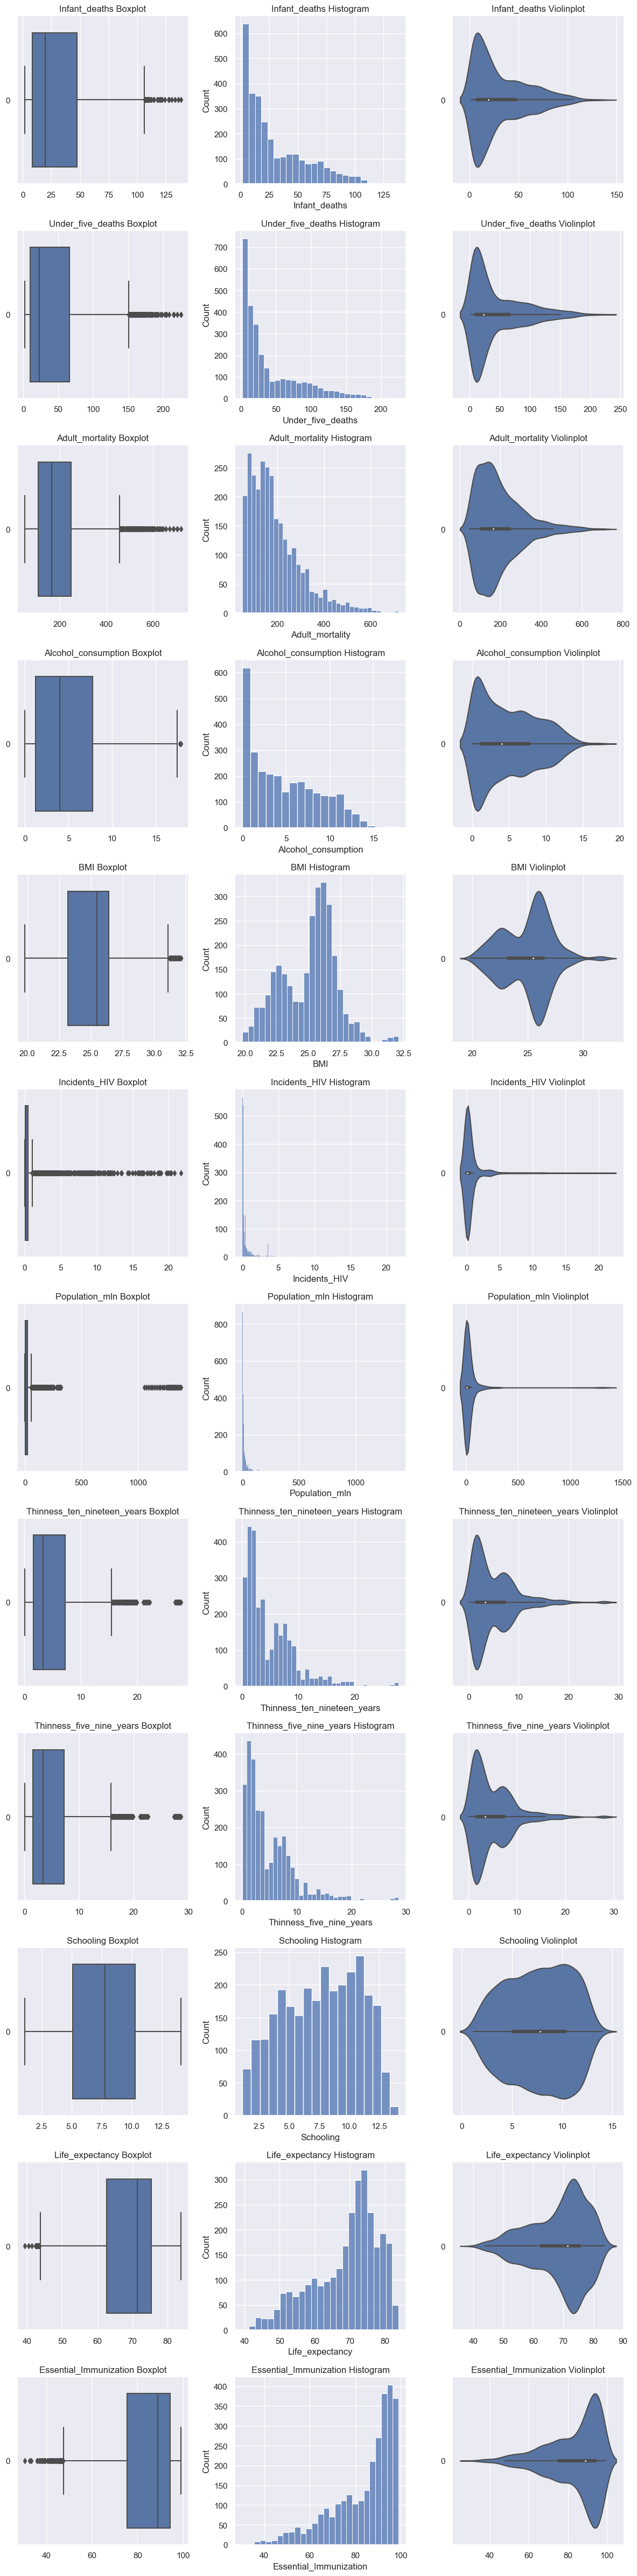

In [16]:
numeric_data = LifeData_Clean.select_dtypes(include=[float])

# Create a grid of subplots with 3 columns and n rows
n = len(numeric_data.columns)
fig, axes = plt.subplots(nrows=n, ncols=3, figsize=(12, 4*n))

# Loop through each numeric variable and create plots
count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    axes[count,0].set_title(f"{var} Boxplot")
    axes[count,1].set_title(f"{var} Histogram")
    axes[count,2].set_title(f"{var} Violinplot")
    count += 1

plt.tight_layout()
plt.show()

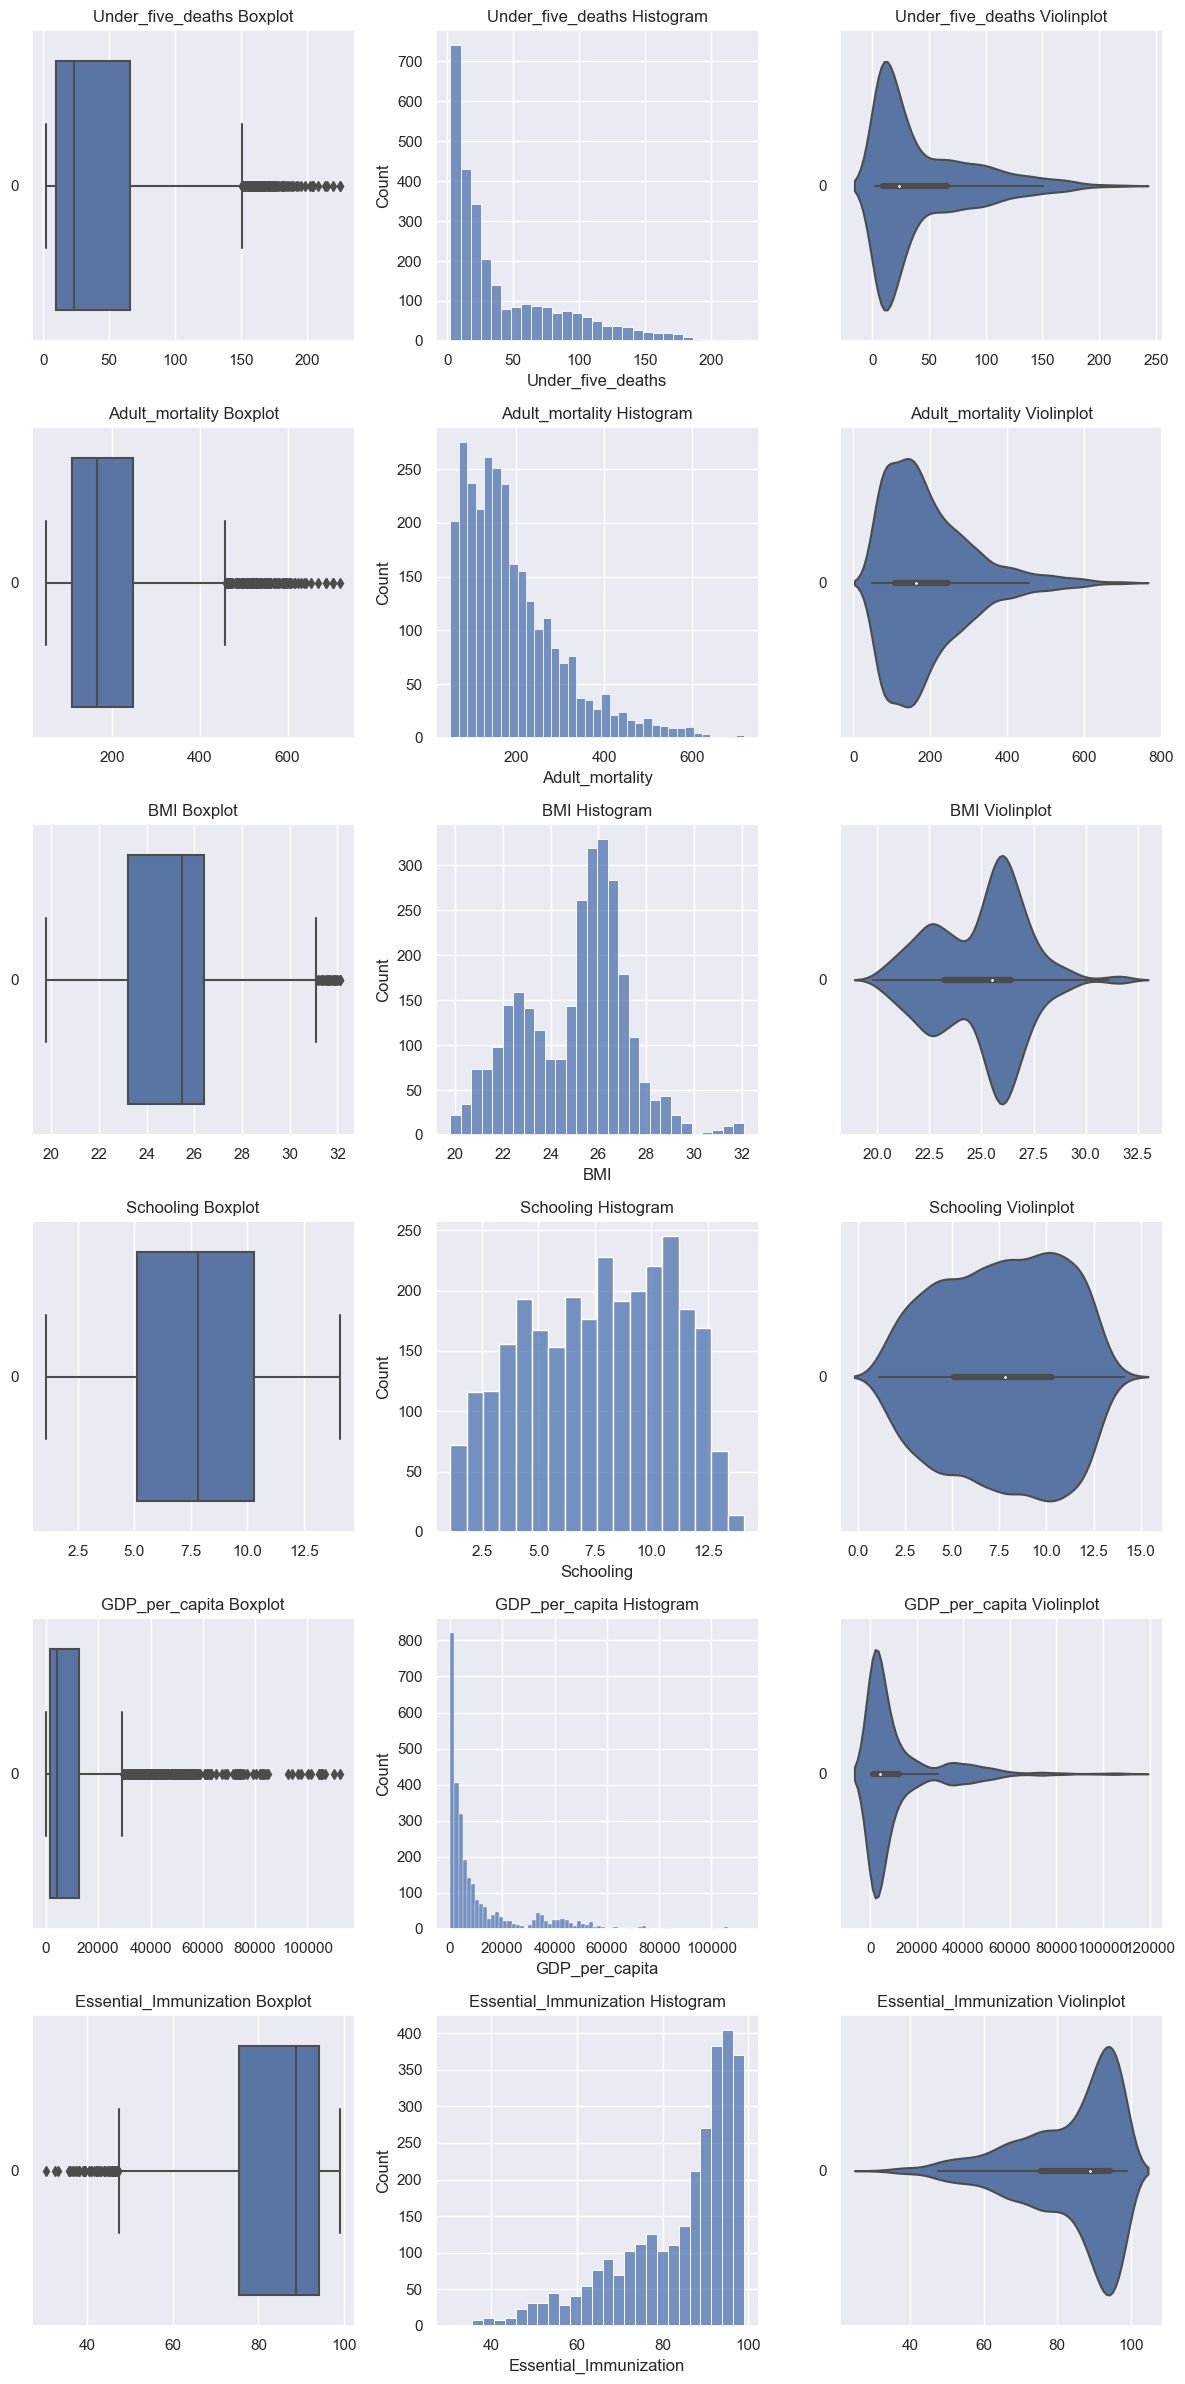

In [21]:
LifeData_Variables = pd.DataFrame(LifeData_Clean[['Under_five_deaths', 'Adult_mortality', 'BMI', 'Schooling','GDP_per_capita', 'Essential_Immunization']])
# Create a grid of subplots with 3 columns and n rows
n = len(LifeData_Variables.columns)
fig, axes = plt.subplots(nrows=n, ncols=3, figsize=(12, 4*n))

# Loop through each numeric variable and create plots
count = 0
for var in LifeData_Variables:
    sb.boxplot(data = LifeData_Variables[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = LifeData_Variables[var], ax = axes[count,1])
    sb.violinplot(data = LifeData_Variables[var], orient = "h", ax = axes[count,2])
    axes[count,0].set_title(f"{var} Boxplot")
    axes[count,1].set_title(f"{var} Histogram")
    axes[count,2].set_title(f"{var} Violinplot")
    count += 1

plt.tight_layout()
plt.show()

---

# **Part 3: Machine Learning**

In this section, we will use machine learning to predict Life Expectancy. First we will use a Multivariate Linear Regression Model, followed by a Classification Tree.

In [ ]:
# When we look at the data, Country and Status columns are composed of objects. Because we need to be int or float.
LifeData_Clean.drop(columns = ["Country", "Region"], axis=1, inplace=True)

## Model 1: Linear Regression Models

First, we use a univariate linear regression, with the highest correlated variable "Under_five_deaths".

Intercept of Regression 	: b =  [77.23577327]
Coefficients of Regression 	: a =  [[-0.1945501]]

          Predictors  Coefficients
0  Under_five_deaths      -0.19455



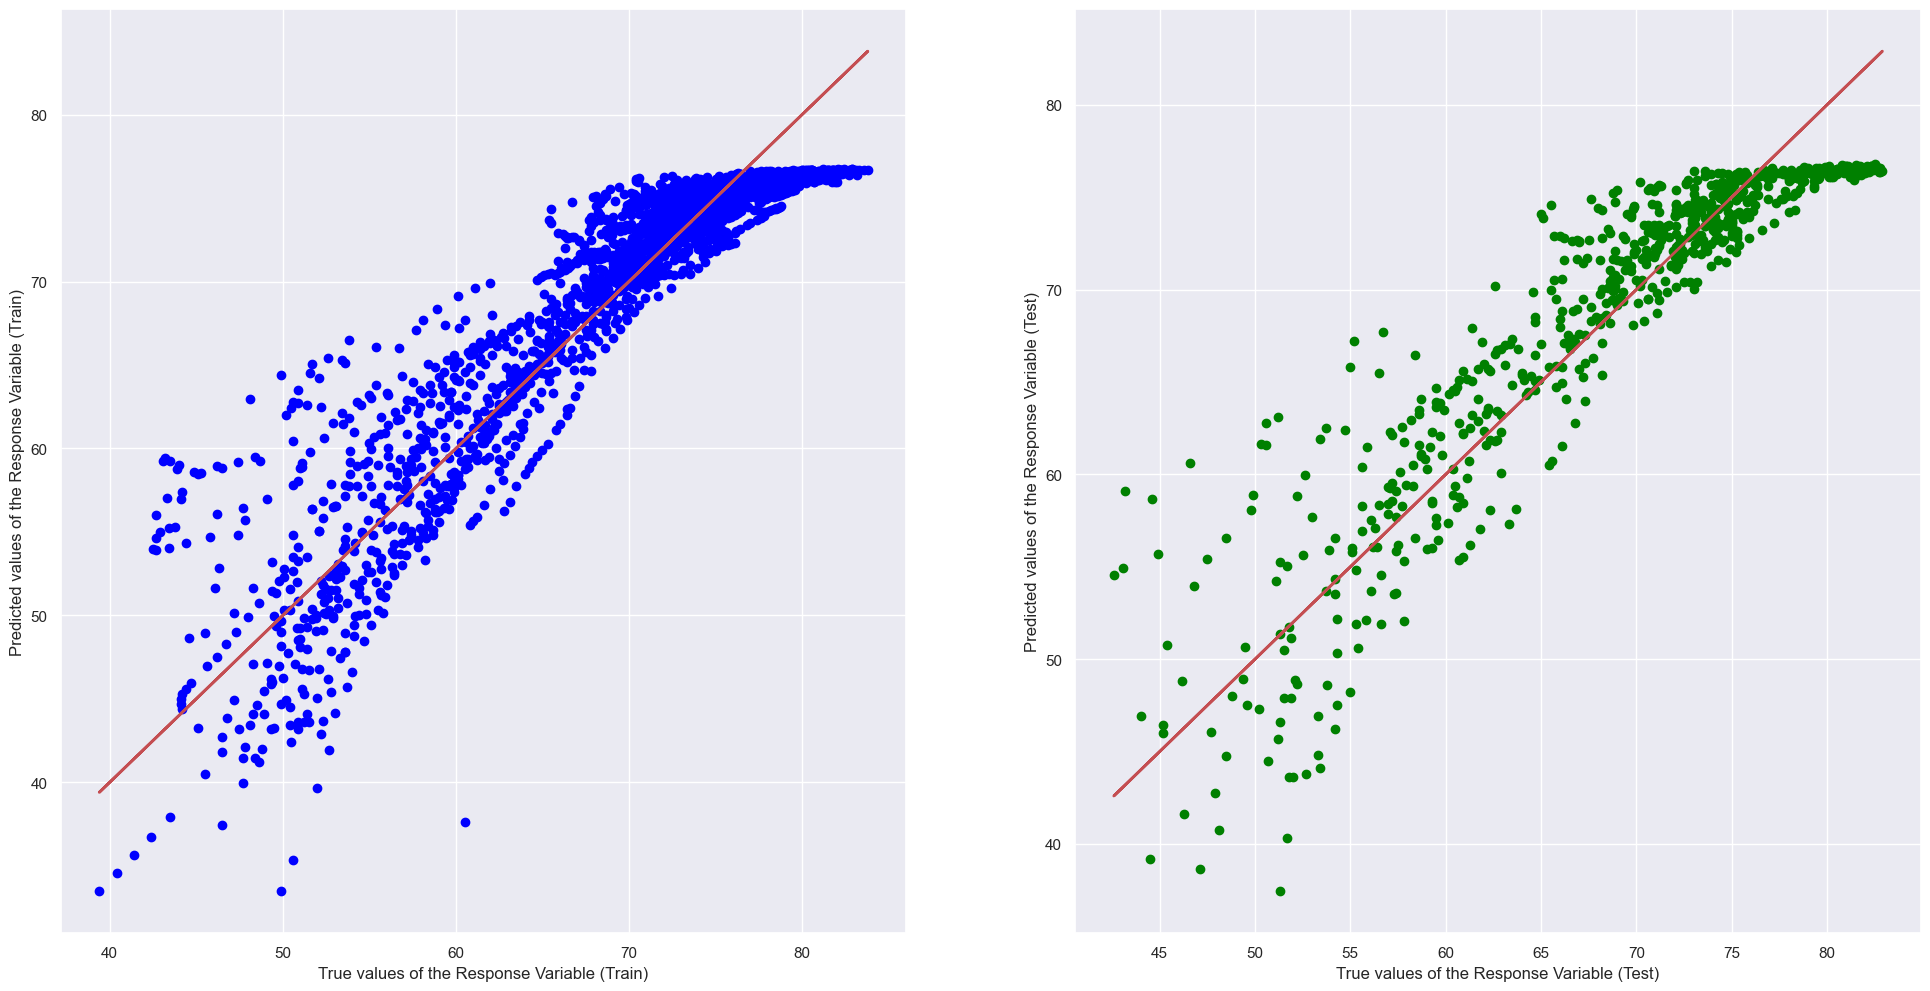

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8498697517549095
Mean Squared Error (MSE) 	: 13.42322557193143

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8386315145581712
Mean Squared Error (MSE) 	: 13.79515502560392



In [ ]:
# Independent/Predictor Variables:
x = pd.DataFrame(LifeData_Clean[["Under_five_deaths"]])

# Dependent/Response Variable:
y = pd.DataFrame(LifeData_Clean["Life_expectancy"])       

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 69)
lm = LinearRegression()
linreg = lm.fit(x_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

First, we try a multivariate linear regression with top 3 highest correlated variables: Under-five deaths, BMI and Schooling. We do not use infant deaths, as it will be a subset of Under-five deaths.

Intercept of Regression 	: b =  [79.8793915]
Coefficients of Regression 	: a =  [[-0.19048787 -0.16573643  0.174414  ]]

          Predictors  Coefficients
0  Under_five_deaths     -0.190488
1                BMI     -0.165736
2          Schooling      0.174414



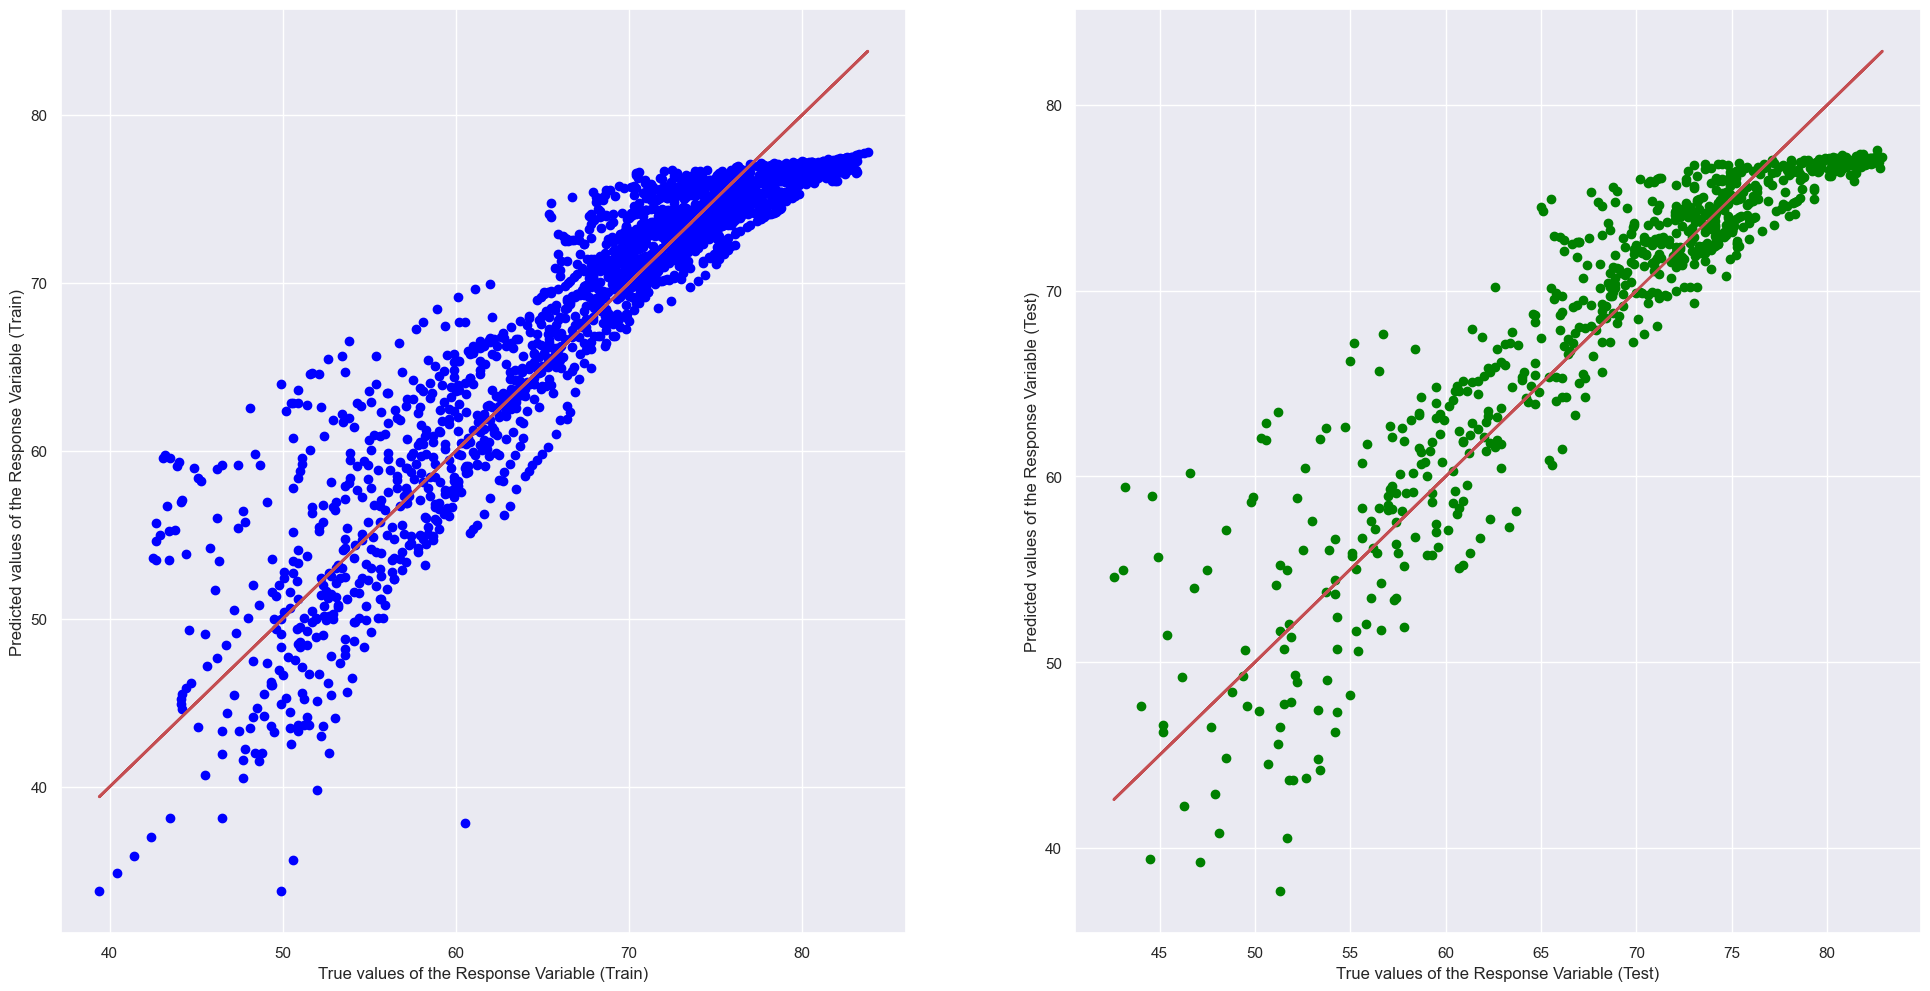

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.851473414164204
Mean Squared Error (MSE) 	: 13.279841260556394

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8412444477209201
Mean Squared Error (MSE) 	: 13.5717792037824



In [ ]:
# Independent/Predictor Variables:
x = pd.DataFrame(LifeData_Clean[["Under_five_deaths","BMI", "Schooling"]])

# Dependent/Response Variable:
y = pd.DataFrame(LifeData_Clean["Life_expectancy"])       

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 69)
lm = LinearRegression()
linreg = lm.fit(x_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [82.35710564]
Coefficients of Regression 	: a =  [[-1.94036176e-01 -9.62226053e-02 -1.67758655e-01  1.14400062e-04
  -3.32183683e-02]]

               Predictors  Coefficients
0       Under_five_deaths     -0.194036
1                     BMI     -0.096223
2               Schooling     -0.167759
3          GDP_per_capita      0.000114
4  Essential_Immunization     -0.033218



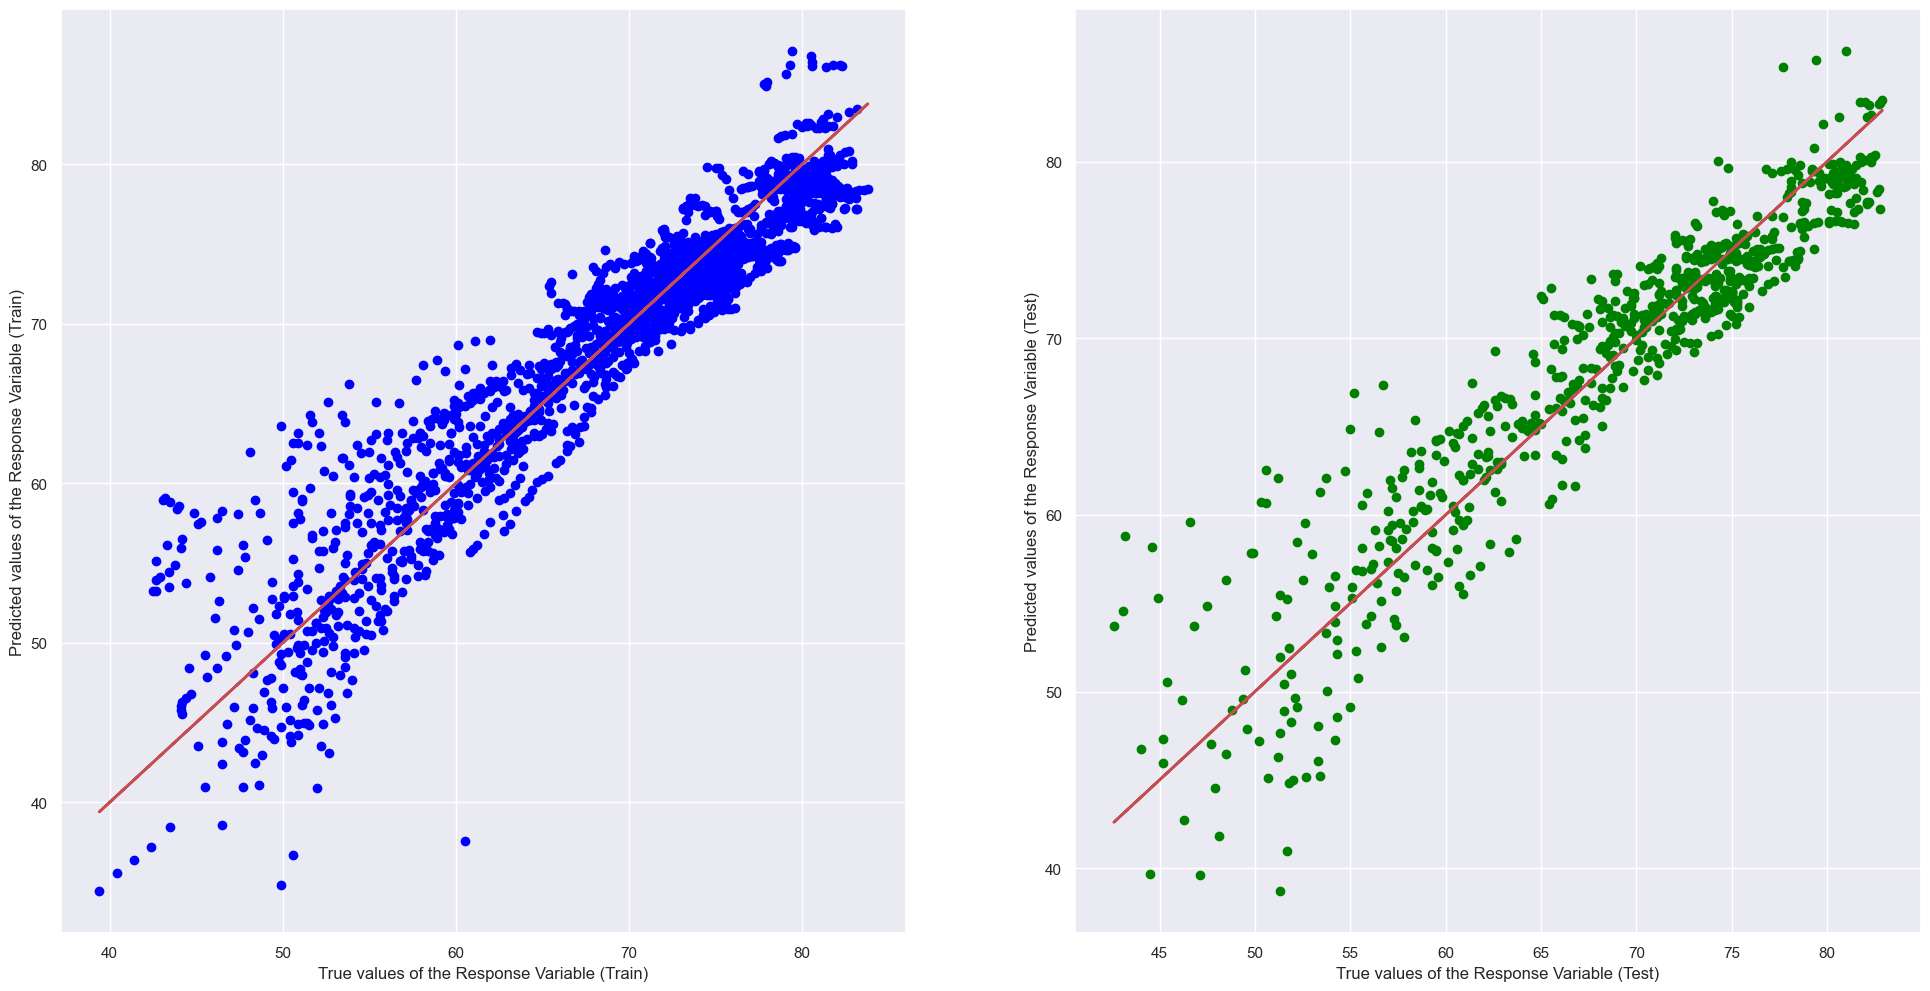

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8804964787358511
Mean Squared Error (MSE) 	: 10.684873576909132

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8760267228310288
Mean Squared Error (MSE) 	: 10.598293544712218



In [ ]:
# Independent/Predictor Variables:
x = pd.DataFrame(LifeData_Clean[["Under_five_deaths", "BMI", "Schooling", "GDP_per_capita", "Essential_Immunization"]])

# Dependent/Response Variable:
y = pd.DataFrame(LifeData_Clean["Life_expectancy"])       

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 69)
lm = LinearRegression()
linreg = lm.fit(x_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

We can also use a decision tree to determine whether a country is a developing country or not.

## Model 2: Decision Tree Classifier and Regressor

Train Set : (2291, 1) (2291, 1)
Test Set  : (573, 1) (573, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9052815364469664

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.912739965095986



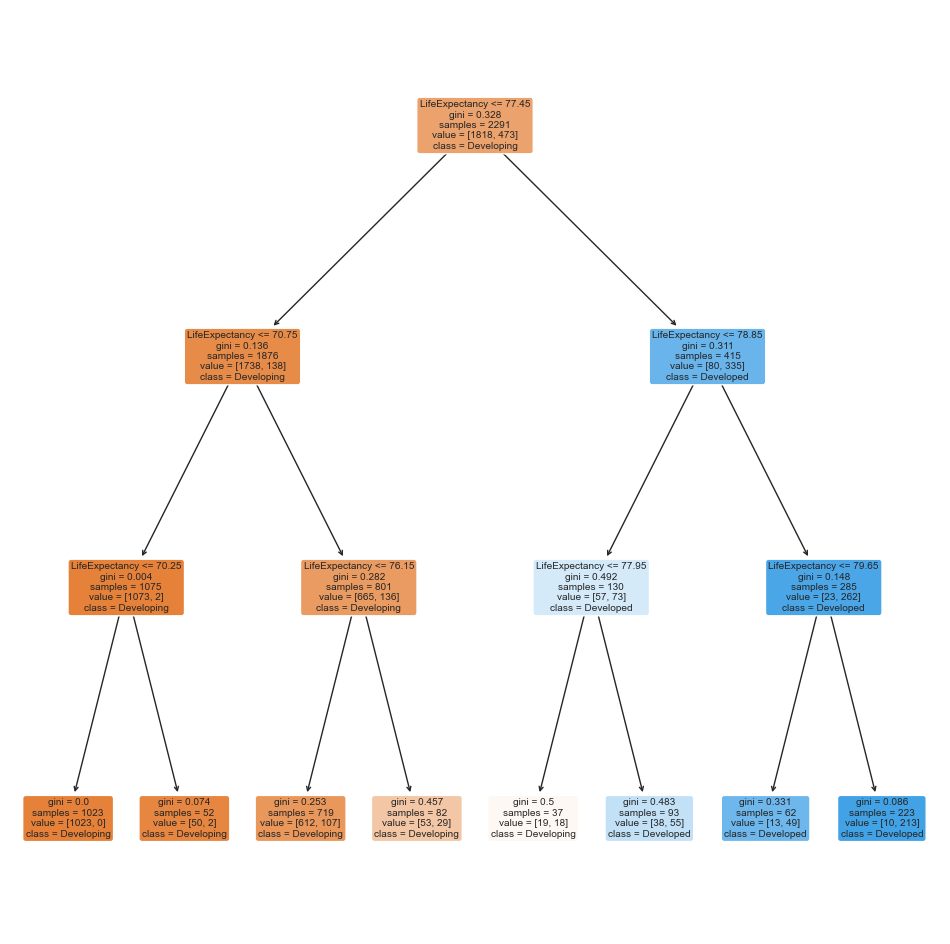

In [ ]:
LifeExpectancy=pd.DataFrame(LifeData_Clean['Life_expectancy'])
Developed=pd.DataFrame(LifeData_Clean['Economy_status_Developed'])

X_train, X_test, y_train, y_test = train_test_split(LifeExpectancy,Developed, test_size = 0.2,random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

dectree = DecisionTreeClassifier(max_depth = 3)

dectree.fit(X_train,y_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, feature_names=["LifeExpectancy"], class_names=["Developing","Developed"])

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Checking the accuracy of the Model: Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

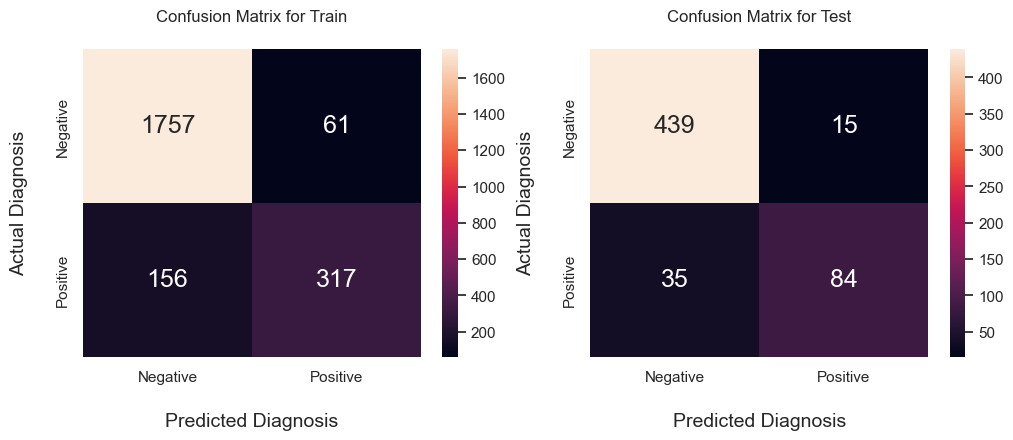

True Positive Rate Train :	 67.02%
True Negative Rate Train :	 96.64%
False Positive Rate Train :	 3.36%
False Negative Rate Train :	 32.98%

True Positive Rate Test :	 70.59%
True Negative Rate Test :	 96.70%
False Positive Rate Test :	 3.30%
False Negative Rate Test :	 29.41%


In [ ]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
ax2 = sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1],)

# set x-axis label and ticks. 
ax1.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax1.xaxis.set_ticklabels(['Negative', 'Positive'])
ax2.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax2.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax1.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax1.yaxis.set_ticklabels(['Negative', 'Positive'])
ax2.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax2.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax1.set_title("Confusion Matrix for Train", fontsize=12, pad=20)
ax2.set_title("Confusion Matrix for Test", fontsize=12, pad=20)

plt.show()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("True Positive Rate Train :\t {0:.2%}".format(tpTrain/(tpTrain + fnTrain)))
print("True Negative Rate Train :\t {0:.2%}".format(tnTrain/(tnTrain + fpTrain)))
print("False Positive Rate Train :\t {0:.2%}".format(fpTrain/(tnTrain + fpTrain)))
print("False Negative Rate Train :\t {0:.2%}".format(fnTrain/(tpTrain + fnTrain)))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)
print("True Positive Rate Test :\t {0:.2%}".format(tpTest/(tpTest + fnTest)))
print("True Negative Rate Test :\t {0:.2%}".format(tnTest/(tnTest + fpTest)))
print("False Positive Rate Test :\t {0:.2%}".format(fpTest/(tnTest + fpTest)))
print("False Negative Rate Test :\t {0:.2%}".format(fnTest/(tpTest + fnTest)))

We can also use a decision tree regressor to predict continous variables like life expectancy, instead of just categorical variables like status of developing countries.

Train Set : (2291, 5) (2291, 1)
Test Set  : (573, 5) (573, 1)
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9156509328523966
Mean Squared Error (MSE) 	: 7.5214794199662975

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9127318056075991
Mean Squared Error (MSE) 	: 7.455403034014238



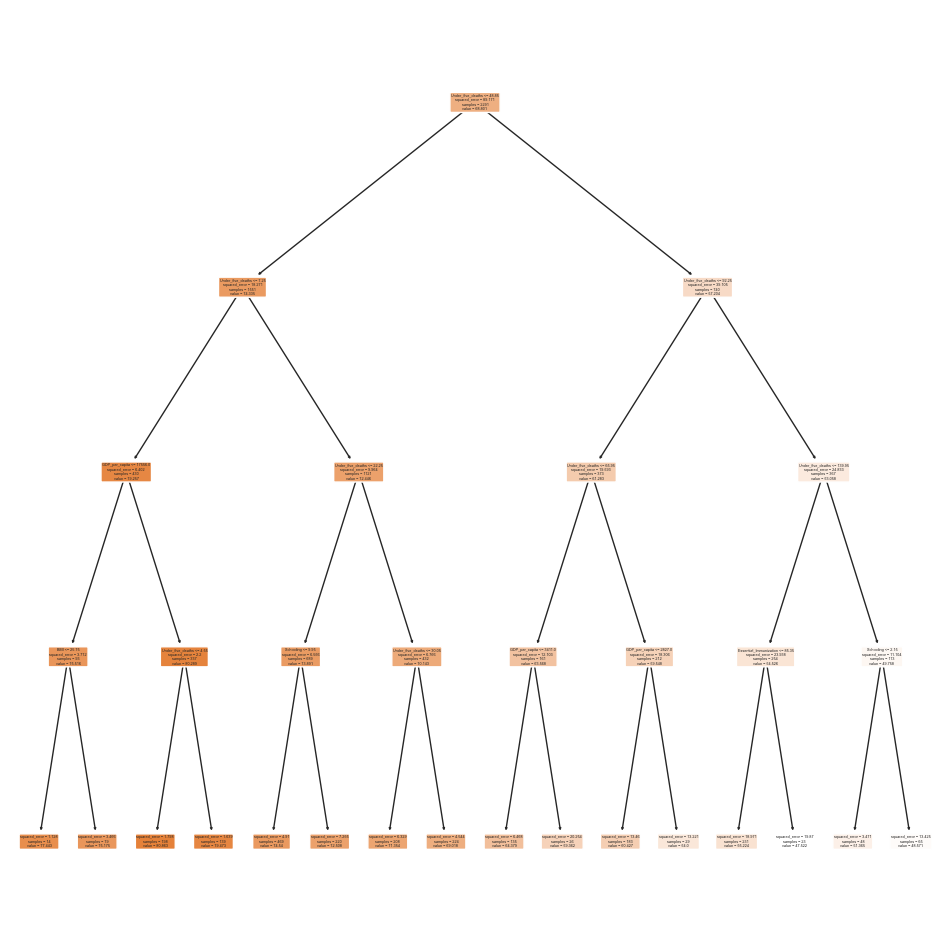

In [ ]:
LifeExpectancy=pd.DataFrame(LifeData_Clean['Life_expectancy'])
Predictors=pd.DataFrame(LifeData_Clean[["Under_five_deaths", "BMI", "Schooling", "GDP_per_capita", "Essential_Immunization"]])

X_train, X_test, y_train, y_test = train_test_split(Predictors, LifeExpectancy, test_size = 0.2,random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

dtreg = DecisionTreeRegressor(max_depth = 4)
dtreg.fit(X_train, y_train)

f = plt.figure(figsize=(12,12))
plot_tree(dtreg, filled=True, rounded=True, feature_names=["Under_five_deaths", "BMI", "Schooling", "GDP_per_capita", "Essential_Immunization"], class_names=["Life Expectancy"])
plt.savefig('DecisionTreeRegression_out.pdf') # Higher resolution image for checking

y_train_pred = dtreg.predict(X_train)
y_test_pred = dtreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dtreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dtreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

As this is a regression model, Precision and Recall i.e. the confusion matrix, cannot be used in this case as the variables are continuous.

## Model 3: Random Forest Regressor

Let's see if we can improve on the results of our decision tree using a random forest model, as the true positive rate for our model is still low for both the train and test data.

In [ ]:
LifeExpectancy=pd.DataFrame(LifeData_Clean['Life_expectancy'])
Predictors=pd.DataFrame(LifeData_Clean[["Under_five_deaths", "BMI", "Schooling", "GDP_per_capita", "Essential_Immunization"]])

X_train, X_test, y_train, y_test = train_test_split(Predictors, LifeExpectancy, test_size = 0.2,random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Transforming y_train from DataFrame to Series as 1d array is expected by RandomForestClassifier
y_train = y_train.squeeze()

Train Set : (2291, 5) (2291, 1)
Test Set  : (573, 5) (573, 1)


In [ ]:
# Create the Random Forest object
rforestreg = RandomForestRegressor(max_depth = 10, n_estimators = 100)

# Fit Random Forest on Train Data
rf = rforestreg.fit(X_train, y_train.ravel())
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = rforestreg.predict(X_train)
y_test_pred = rforestreg.predict(X_test)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforestreg.score(X_train, y_train))
print()
print("Test Data")
print("Accuracy  :\t", rforestreg.score(X_test, y_test))
print()

Train Data
Accuracy  :	 0.9924485378482107

Test Data
Accuracy  :	 0.9778088810075729



As this is a regression model, Precision and Recall i.e. the confusion matrix, cannot be used in this case as the variables are continuous.

## Model 4: K-Neighbours Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

LifeExpectancy=pd.DataFrame(LifeData_Clean['Life_expectancy'])
Predictors=pd.DataFrame(LifeData_Clean[["Under_five_deaths", "BMI", "Schooling", "GDP_per_capita", "Essential_Immunization"]])

X_train, X_test, y_train, y_test = train_test_split(Predictors, LifeExpectancy, test_size = 0.2,random_state=0)

# Fit the KNN model on train data
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

# Predict test data using the trained model
x_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8817447112872456
Mean Squared Error (MSE) 	: 0.6733704246656964

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7981790912369457
Mean Squared Error (MSE) 	: 17.241747993019192



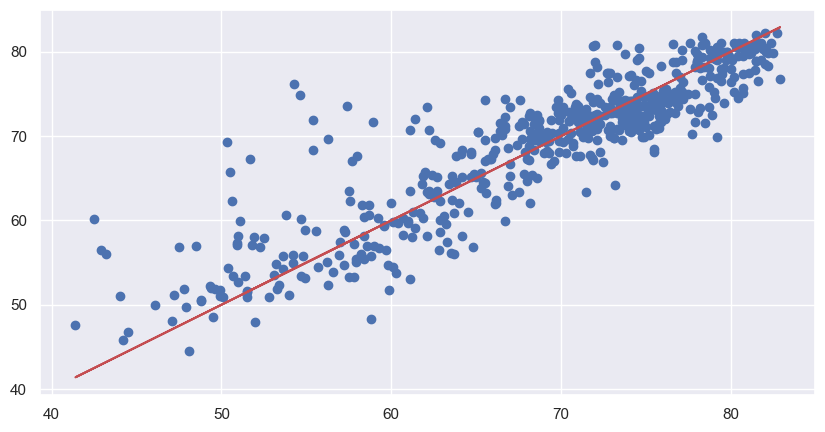

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')